# Pandas Tutorial

**Tutorial by Ellianna Abrahams**

In addition to being adorable, bamboo-loving bears, **pandas** is a Python library that makes it easy to store and work with large datasets. This notebook will teach you the basics of using pandas.

![](https://cache.desktopnexus.com/thumbseg/1321/1321509-bigthumbnail.jpg)

But first...
## Super Quick Python Review

Python is a general-purpose coding language. It allows us to complete computer analyses, like adding.

In [ ]:
1 + 1

Python is also an object-oriented language, which means that this analysis is conducted on objects, like data or variables. So we can save our above analysis of 1 + 1 as a variable. Once we've done that we can use that variable in other analyses.

In [ ]:
x = 1 + 1

In [ ]:
print(x) # Printing outputs what is stored inside a variable below a notebook cell.

In [ ]:
print?

In [ ]:
y = x * 3 # An asterisk is used to multiply in python. 

In [ ]:
print(y)

In [ ]:
z = y/x

In [ ]:
print(z)

In python, a function is a programs that conducts a specific analytical task. Addition, subtraction, multiplication, division and `print()` are all default functions in python. There are more defaults as well, which you can look up in the python documentation. What does a double asterisk do?

In [ ]:
# Try out an equation with a double asterisk here.

Over the years many people have been building complex functions in python to allow for analyzing data. These functions can be built into libraries or modules, and there are several that are used across many disciplines. For last week's assignment you worked with numpy, a library containing complex mathematical functions. Today we'll be working with pandas in this tutorial, and matplotlib in the next tutorial. Let's import those libraries here and save them in variables so that we can easily interact with them later.

### Imports

In future notebooks, the following cell will usually be at the top of any code. Generally organizing imports at the top of a notebook makes it easier to remember which libraries you've already imported and follows the guidelines of good coding practice.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Show what is stored inside the variable `np`.

In [ ]:
# Which function above would you use to show you what is inside np? Give it a try here!

## The Basics - Create Data

Let's take a look at the 5 most popular baby names in the U.S. in 2018 by. Data was taken from www.ssa.gov.

In [10]:
# We can write words into python code by surrounding a word or number with quotation marks.
# This is called a string, and we have stored our five strings in a list.
names = ['Liam', 'Emma', 'Noah', 'Olivia', 'Ava']

#Whole numbers are called integers.
birth_count = [19837, 18688, 18267, 17921, 14924]

#Decimals or fractions are called floats.
percentage_of_births = [0.0102, 0.0101, 0.0097, 0.0095, 0.0081]

In [11]:
type(names)

list

In [12]:
type?

Let's store this data in a pandas spreadsheet, called a `DataFrame`. 
We can't create a dataframe directly from our lists, so we're going to store them in a dictionary, or `dict`.

In [13]:
data = {'names': names, 'count': birth_count, 'percentage': percentage_of_births}

In [14]:
type(data)

dict

Now we can make a dataframe! Notice how we access the `DataFrame` function in the pandas library by using the variable `pd` that we defined above.

In [15]:
df = pd.DataFrame(data)

In [16]:
df

,count,names,percentage
0,19837,Liam,0.0102
1,18688,Emma,0.0101
2,18267,Noah,0.0097
3,17921,Olivia,0.0095
4,14924,Ava,0.0081


We can save our dataframe to a csv file so that we can share it with our colleagues. If you want to save it somewhere specific on your computer, you can specify the path inside the string.

In [17]:
df.to_csv('save_the_pandas.csv')

## The Basics - Get Data

Let's say that your research group already has collected data that they've saved in a csv file. You can open csv files from pandas too using the pandas `read_csv()` function.

In [19]:
names_df = pd.read_csv('baby-names.csv')

#This csv file was created by Hadley Wickham and is available at https://github.com/hadley/data-baby-names

There are a few ways you can explore what is in your csv file. For example, you can see what columns are included, you can look at the first few lines, or you can see how many rows, or items, there are in the dataframe.

In [20]:
names_df.columns

# Note that the data for this csv file is taken from the US Social Security website. 
# The SSO has historically assigned a binary gender at birth and is therefore biased in its collection.
# It is always important to keep in mind bias that might be included in data collection!

Index(['year', 'name', 'percent', 'gender'], dtype='object')

In [21]:
names_df.head(8)

,year,name,percent,gender
0,1880,John,0.081541,boy
1,1880,William,0.080511,boy
2,1880,James,0.050057,boy
3,1880,Charles,0.045167,boy
4,1880,George,0.043292,boy
5,1880,Frank,0.027380,boy
6,1880,Joseph,0.022229,boy
7,1880,Thomas,0.021401,boy


In [22]:
len(names_df)

258000

From exploring the data, we can see that this dataset includes information about 258,000 popular names according to the population percentage given the name each year sorted by gender. 

## Analyzing Data
We can ask questions about this dataset and look for answers using pandas. Let's see how many years are included in the dataset.

In [23]:
#First we isolate the column including information about each year

years = names_df['year']

In [24]:
# Now we find the minimum value in that column, using the .min() command
years.min()

1880

Can you guess what function will give us the maximum value?

That's a lot of years! Another way to visualize how many years is to view a distribution of the data, or a histogram of how many names we are looking at each year.

Text(0.5,0,'Year')

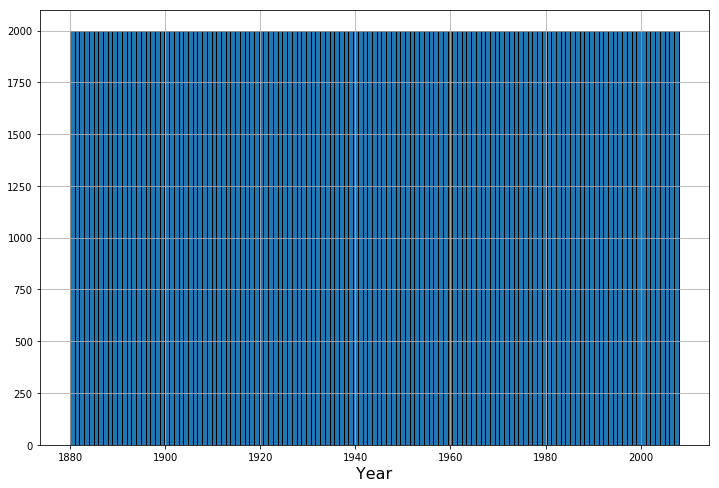

In [26]:
# plt.figure(figsize = (12,8))
years.hist(bins=129, edgecolor='black', linewidth=1)
plt.xlabel('Year', fontsize=16)

As you can see this dataset only looks at the 2000 most popular names each year from 1880 until 2008, leading to a continuous or uniform distribution (https://www.youtube.com/watch?v=cyIEhL92wiw).

Maybe you are interested in knowing how popular the most popular name was by percentage of population given that name, or how popular the least popular name was. What commands above could you use to find the answer to this?

That's a pretty wide range within popularity! But remember that the population of the US has grown since 1880 as well. So maybe a more accurate metric would be to find the average percentage popularity of a name.

In [27]:
names_df['percent'].mean()

0.0008944713333333369

In [28]:
names_df['percent'].median()

0.000164

In [29]:
names_df['percent'].mode()

0    0.000051
dtype: float64

We'll dive more into the difference between mean, median and mode later in the summer. For the final part of this tutorial, we'll look at dividing the data into subsets. Maybe your study is only interested in exploring the most popular names given to baby girls in the 1960s.

In [30]:
subset = names_df.loc[(years >= 1960) & (years < 1970) & (names_df['gender'] == 'girl')]

How do you view the first 12 lines of this subset?

Let's sort our subset by percentage popularity.

In [31]:
subset.sort_values(by='percent', ascending=False)

,year,name,percent,gender
214000,1965,Lisa,0.032982,girl
215000,1966,Lisa,0.032416,girl
216000,1967,Lisa,0.030539,girl
217000,1968,Lisa,0.028974,girl
212000,1963,Lisa,0.028189,girl
213000,1964,Lisa,0.027737,girl
218000,1969,Lisa,0.025556,girl
209000,1960,Mary,0.024750,girl
210000,1961,Mary,0.022958,girl
211000,1962,Lisa,0.022741,girl


## Merging Dataframes

Let's say that your research advisor gave you three csv files. One contained all the data from the 1800s, the second contained all the data from the 1900s and the third contained all the data from the 2000s. This is not the case here, because the handy csv file that we have has all three centuries, so we are going to "simulate" the situation.

In [32]:
eighteen_df = names_df.loc[years < 1900].copy()

The `.copy()` function makes a copy of the original dataframe that only contains the rows that you specified in the `.loc[]` function.

In [33]:
nineteen_df = names_df.loc[(years >= 1900) & (years < 2000)].copy()
millenium_df = names_df.loc[years >= 2000].copy()

Now that you have all three of these csv files, your advisor asks you to investigate the data in all three of them. It would be so much easier to conduct statistical analysis on a single dataframe rather than three. So let's concatenate the databases.

In [34]:
total_df = pd.concat([eighteen_df, nineteen_df, millenium_df])

In [35]:
len(total_df)

258000

There we have it! The lenght of our concatenated dataset has the correct amount of lines, so we combined our dataset correctly.

Sometimes, you will want to combine data from two different databases that have differing columns and so can't be concatenated. Instead pandas has a powerful function called merge. Let's work through a toy situation, where we invesitigate the likelihood that the band Peter, Paul and Mary could have had different names had they been born in a different year. 

Let's create our data.

In [36]:
names = ['Peter', 'Paul', 'Mary']
percent_1960 = [0.004949, 0.011837, 0.024750]

percent_1961 = [0.004794, 0.011890, 0.022958]

percent_1962 = [0.004560, 0.011321, 0.021457]

In [39]:
sixty_df = pd.DataFrame({'name': names, 'percent_1960': percent_1960})

In [40]:
sixtyone_df = pd.DataFrame({'name': names, 'percent_1961': percent_1961})

In [41]:
sixtytwo_df = pd.DataFrame({'name': names, 'percent_1962': percent_1962})

In [42]:
sixty_df

,name,percent_1960
0,Peter,0.004949
1,Paul,0.011837
2,Mary,0.024750


In [43]:
sixtyone_df

,name,percent_1961
0,Peter,0.004794
1,Paul,0.011890
2,Mary,0.022958


You can also create these three dataframes using the `.loc[]` function. You might want to [rename some columns](https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas). Give it a try here!

In this case, it is clear that we don't want to add rows, to our dataset, instead we want to add new columns, and we don't want the names to repeat. We do this using the `.merge()` function.

In [44]:
sixty_sixtyone_df = pd.merge(sixty_df, sixtyone_df, how='inner', on='name')

In [45]:
sixty_sixtyone_df

,name,percent_1960,percent_1961
0,Peter,0.004949,0.004794
1,Paul,0.011837,0.011890
2,Mary,0.024750,0.022958


You can also run the `.merge()` function directly on the dataframe itself allowing you to merge multiple dataframes at once. This can get pretty long though, so sometimes it is easier to use the first method.

In [46]:
total_df = sixty_df.merge(sixtyone_df, how='inner', on='name').merge(sixtytwo_df, how='inner', on='name')

In [47]:
total_df

,name,percent_1960,percent_1961,percent_1962
0,Peter,0.004949,0.004794,0.004560
1,Paul,0.011837,0.011890,0.011321
2,Mary,0.024750,0.022958,0.021457


You may have noticed that we specified how to merge the datasets inside the `.merge()` function. The specification `inner` indicates that we want the datasets to combine only where they both share specific names. There are many ways to combine datasets. Maybe you are interested in keeping all the rows from one, even where your second dataset doesn't have existing matches. You can read about all the ways to combine datasets using a pandas merge [here](https://www.shanelynn.ie/merge-join-dataframes-python-pandas-index-1/#mergetypes).

## Assignment

Can you make a histogram of the percentage popularity of the name Lisa during the 1960s?

In [ ]:
# HINT: It's very useful to break coding down into written steps and then complete each step one by one.

# Here is a sample of the first step that I might write
# Step 1: Create a subset of the name Lisa in the 1960s.
# Step 2: ...
# ...

Can you make a histogram of the percentage popularity of the name Mary during the 1960s?

Now can you plot them on the same histogram?

Please save the csv file of the subset that you created. Scroll to the bottom of [this documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) to find out how. Once you've completed Ryan's matplotlib tutorial, come back to this one and save a .png of your final histogram too!

## Challenge Assignment

Some names remained popular throughout a decade and some names were only popular for a year or two. 183 of the most popular names in the 1980s were only popular for a year. What were the first five most popular one hit wonders of the 1980s?

We did not go over all the commands that you need to answer this question. Never fear! The internet can be your trusty guide. Head over to https://stackoverflow.com/ and use the pandas documentation to answer this question. Bonus pandas points if you can answer the question in one line of code!

What is the distribution of the count of one hit wonder names over time during the 1980s? Please save your histogram as a .png file.

Now merge this 1980s dataframe with the overall dataset. Can you figure out a way to only keep the names that are popular in and beyond the 1980s in this merge? Write a l